In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('F:/Machine Learning/datasets_228_482_diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
len(data)

768

In [5]:
data.shape

(768, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [11]:
data['Outcome'].unique()

array([1, 0], dtype=int64)

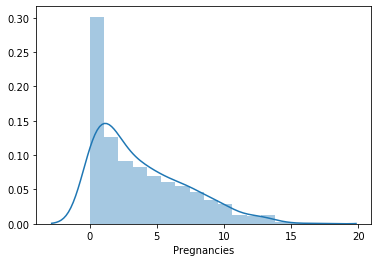

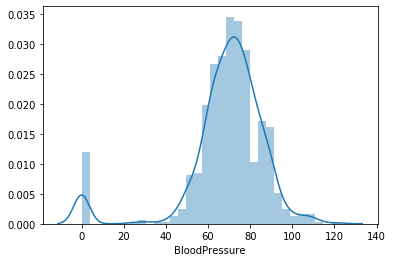

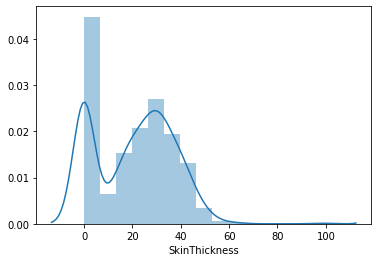

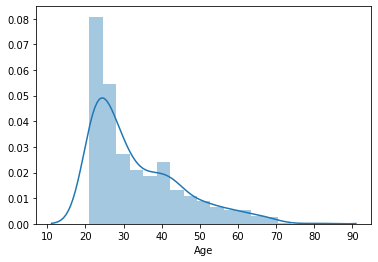

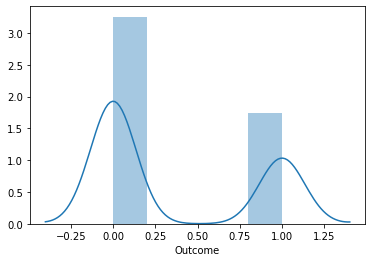

In [12]:
labels=['Pregnancies','BloodPressure','SkinThickness','Age','Outcome']
for i in range(len(labels)):
    plt.figure()
    sns.distplot(data[labels[i]])
    plt.xlabel(labels[i])

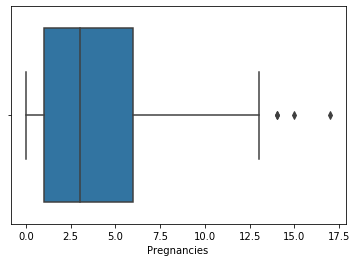

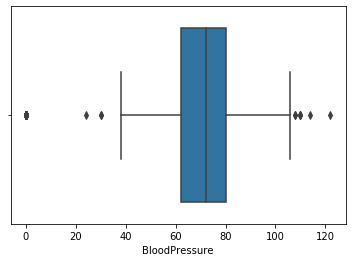

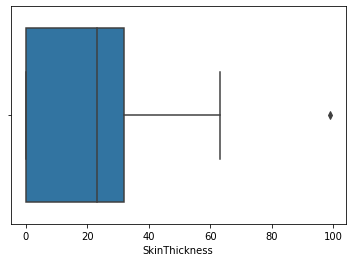

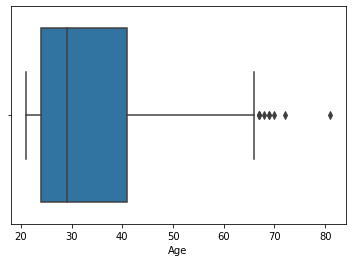

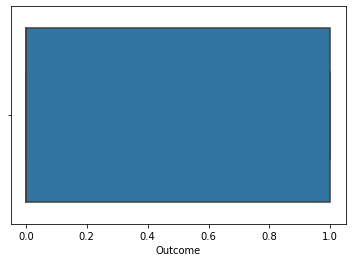

In [13]:
labels=['Pregnancies','BloodPressure','SkinThickness','Age','Outcome']
for i in range(len(labels)):
    plt.figure()
    sns.boxplot(data[labels[i]])
    plt.xlabel(labels[i])

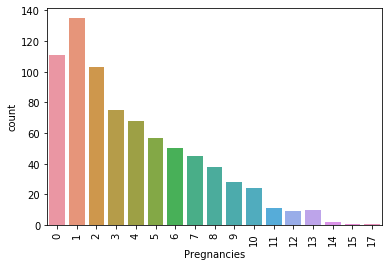

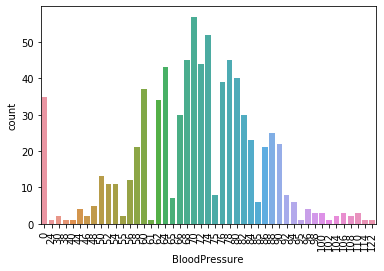

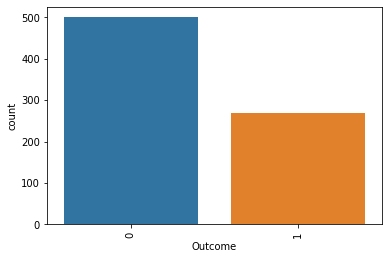

In [14]:
labels=['Pregnancies','BloodPressure','Outcome']
for i in range(len(labels)):
    plt.figure()
    sns.countplot(data[labels[i]])
    plt.xlabel(labels[i])
    plt.xticks(rotation=90)

In [15]:
X=data.drop(['Outcome'],axis=1)
Y=data['Outcome']

In [16]:
from sklearn.feature_selection import chi2

In [17]:
chi_scores = chi2(X,Y)

In [18]:
chi_scores

(array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
        2175.56527292,  127.66934333,    5.39268155,  181.30368904]),
 array([4.55261043e-026, 5.48728628e-309, 2.71819252e-005, 3.15697650e-013,
        0.00000000e+000, 1.32590849e-029, 2.02213728e-002, 2.51638830e-041]))

In [19]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

DiabetesPedigreeFunction     2.022137e-02
BloodPressure                2.718193e-05
SkinThickness                3.156977e-13
Pregnancies                  4.552610e-26
BMI                          1.325908e-29
Age                          2.516388e-41
Glucose                     5.487286e-309
Insulin                      0.000000e+00
dtype: float64

# KNN Algorithm

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
X=data.drop(['Outcome'],axis=1)
Y=data['Outcome']

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [24]:
k=np.arange(1,25)
train_accuracy=np.empty(len(k))
test_accuracy=np.empty(len(k))
for i,k in enumerate(k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    train_accuracy[i]=knn.score(X_train,Y_train)
    test_accuracy[i]=knn.score(X_test,Y_test)
    print(train_accuracy[i])
    print(test_accuracy[i])

1.0
0.7575757575757576
0.8230912476722533
0.7229437229437229
0.8305400372439479
0.7359307359307359
0.8007448789571695
0.7229437229437229
0.8063314711359404
0.7705627705627706
0.7802607076350093
0.7575757575757576
0.7877094972067039
0.7619047619047619
0.7653631284916201
0.7489177489177489
0.7746741154562383
0.7489177489177489
0.7746741154562383
0.7532467532467533
0.7783985102420856
0.7662337662337663
0.7802607076350093
0.7705627705627706
0.7783985102420856
0.7748917748917749
0.7783985102420856
0.7662337662337663
0.7858472998137802
0.7878787878787878
0.7690875232774674
0.7922077922077922
0.7690875232774674
0.7878787878787878
0.7523277467411545
0.7705627705627706
0.7653631284916201
0.7705627705627706
0.7523277467411545
0.7792207792207793
0.750465549348231
0.7792207792207793
0.7486033519553073
0.7705627705627706
0.750465549348231
0.7619047619047619
0.7579143389199255
0.7619047619047619


In [25]:
k=np.arange(1,25)
k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

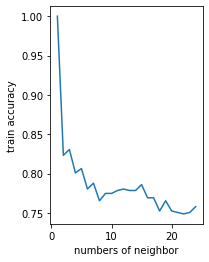

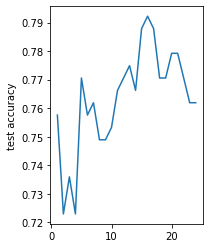

In [26]:
plt.subplot(1,2,1)
plt.plot(k,train_accuracy)
plt.xlabel('numbers of neighbor')
plt.ylabel('train accuracy')
plt.show()
plt.subplot(1,2,2)
plt.plot(k,test_accuracy)
plt.ylabel('test accuracy')
plt.show()

In [27]:
idx=np.where(test_accuracy==max(test_accuracy))
X=k[idx]
X[0]

16

In [28]:
model=KNeighborsClassifier(n_neighbors=X[0],p=1)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=16, p=1)

In [29]:
y_pred=model.predict(X_test)

In [30]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [32]:
model.score(X_train,Y_train)

0.7728119180633147

In [33]:
model.score(X_test,Y_test)

0.8008658008658008

In [34]:
accuracy_score(Y_test,y_pred)

0.8008658008658008

In [35]:
confusion_matrix(Y_test,y_pred)

array([[137,   9],
       [ 37,  48]], dtype=int64)

In [36]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       146
           1       0.84      0.56      0.68        85

    accuracy                           0.80       231
   macro avg       0.81      0.75      0.77       231
weighted avg       0.81      0.80      0.79       231



# Naive Bayes Classifier

In [37]:
X=data.drop(['Outcome'],axis=1)
Y=data['Outcome']

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [39]:
x=sc.fit_transform(X)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
model1=GaussianNB()

In [43]:
model1.fit(X_train,Y_train)

GaussianNB()

In [44]:
pred=model1.predict(X_test)

In [45]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [46]:
model1.score(X_train,Y_train)

0.7616387337057728

In [47]:
model1.score(X_test,Y_test)

0.7835497835497836

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [49]:
accuracy_score(Y_test,pred)

0.7835497835497836

In [50]:
confusion_matrix(Y_test,pred)

array([[128,  18],
       [ 32,  53]], dtype=int64)

In [51]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.75      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231

